[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/machine_learning_demo(from_web_db).ipynb)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving abalone.data to abalone.data


In [0]:
import pandas as pd
pd.set_option('precision',2)
df=pd.read_csv('abalone.data',names=('sex','length','width','height','weight','rings'),usecols=[0,1,2,3,4,8])

In [31]:
df.dtypes

sex        object
length    float64
width     float64
height    float64
weight    float64
rings       int64
dtype: object

In [32]:
df['age']=df['rings']+1.5
df.head()

,sex,length,width,height,weight,rings,age
0,M,0.46,0.36,0.10,0.51,15,16.5
1,M,0.35,0.27,0.09,0.23,7,8.5
2,F,0.53,0.42,0.14,0.68,9,10.5
3,M,0.44,0.36,0.12,0.52,10,11.5
4,I,0.33,0.26,0.08,0.20,7,8.5


In [33]:
df2=df.loc[:,['length','width','height']]
df2.describe()

,length,width,height
count,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14
std,0.12,0.10,0.04
min,0.07,0.06,0.00
25%,0.45,0.35,0.12
50%,0.55,0.42,0.14
75%,0.61,0.48,0.17
max,0.81,0.65,1.13


In [34]:
df_sex=pd.get_dummies(df['sex'],prefix='sex')
df_sex.head()

,sex_F,sex_I,sex_M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [35]:
train_data=df_sex.join(df).drop(['sex','rings'],axis=1)
train_data.head()

,sex_F,sex_I,sex_M,length,width,height,weight,age
0,0,0,1,0.46,0.36,0.10,0.51,16.5
1,0,0,1,0.35,0.27,0.09,0.23,8.5
2,1,0,0,0.53,0.42,0.14,0.68,10.5
3,0,0,1,0.44,0.36,0.12,0.52,11.5
4,0,1,0,0.33,0.26,0.08,0.20,8.5


In [36]:
X_train=train_data.iloc[:,:7]
y_train=train_data.iloc[:,7]
X_train.head()

,sex_F,sex_I,sex_M,length,width,height,weight
0,0,0,1,0.46,0.36,0.10,0.51
1,0,0,1,0.35,0.27,0.09,0.23
2,1,0,0,0.53,0.42,0.14,0.68
3,0,0,1,0.44,0.36,0.12,0.52
4,0,1,0,0.33,0.26,0.08,0.20


In [37]:
y_train.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: age, dtype: float64

In [0]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [39]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
prediction=model.predict(X_train)

In [0]:
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(y_train,prediction)

1.3066297581996646

In [43]:
from sklearn.externals import joblib
joblib.dump(model,'abalone_randomforest.pkl')

['abalone_randomforest.pkl']

In [0]:
import numpy as np
y_train_prediction=np.array([y_train,prediction])
np.save('y_train_prediction',y_train_prediction)

In [0]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

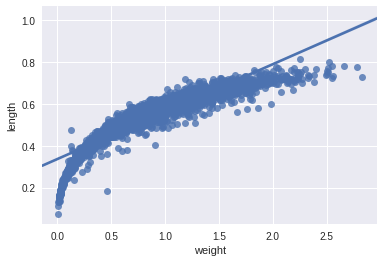

In [49]:
sns.regplot(x='weight',y='length',data=train_data)

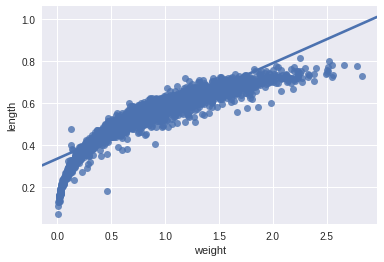

In [50]:
sns.regplot(x='weight',y='length',data=train_data,ci=50)

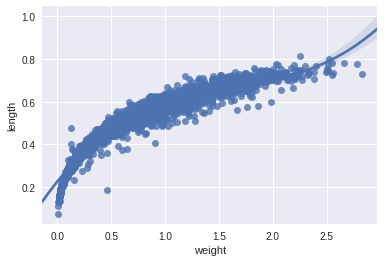

In [51]:
sns.regplot(x='weight',y='length',data=train_data,order=3)

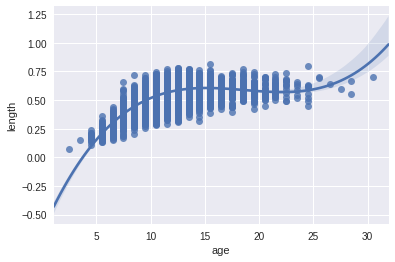

In [55]:
sns.regplot(x='age',y='length',data=train_data,order=3)